In [43]:
import os 
import math
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "datasets/"

column_names = ["x", "y"]
data = pd.read_csv("datasets/data.csv", names=column_names)
print(data)

            x           y
0   32.502345   31.707006
1   53.426804   68.777596
2   61.530358   62.562382
3   47.475640   71.546632
4   59.813208   87.230925
5   55.142188   78.211518
6   52.211797   79.641973
7   39.299567   59.171489
8   48.105042   75.331242
9   52.550014   71.300880
10  45.419730   55.165677
11  54.351635   82.478847
12  44.164049   62.008923
13  58.168471   75.392870
14  56.727208   81.436192
15  48.955889   60.723602
16  44.687196   82.892504
17  60.297327   97.379897
18  45.618644   48.847153
19  38.816818   56.877213
20  66.189817   83.878565
21  65.416052  118.591217
22  47.481209   57.251819
23  41.575643   51.391744
24  51.845187   75.380652
25  59.370822   74.765564
26  57.310003   95.455053
27  63.615561   95.229366
28  46.737619   79.052406
29  50.556760   83.432071
..        ...         ...
70  31.588117   50.392670
71  53.660932   63.642399
72  46.682229   72.247251
73  43.107820   57.812513
74  70.346076  104.257102
75  44.492856   86.642020
76  57.50453

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
32.502345269453031    99 non-null float64
31.70700584656992     99 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [32]:
data.describe()

,32.502345269453031,31.70700584656992
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


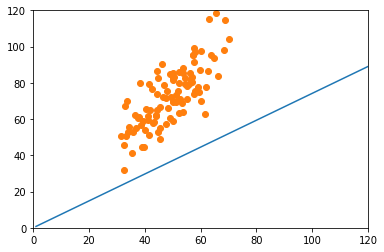

Error = 1469.7330225


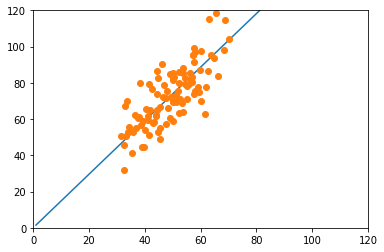

Error = 111.1084996


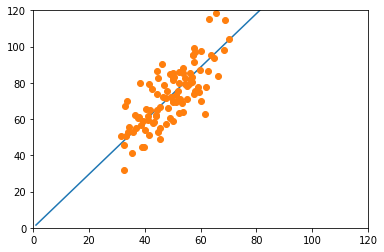

Error = 111.106563544


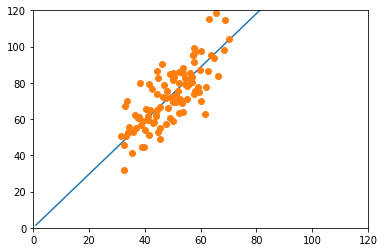

Error = 111.104630238


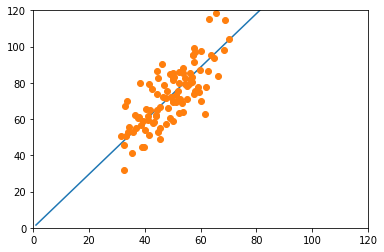

Error = 111.102699677


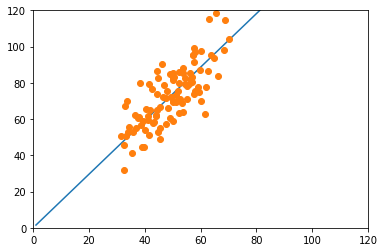

Error = 111.100771857


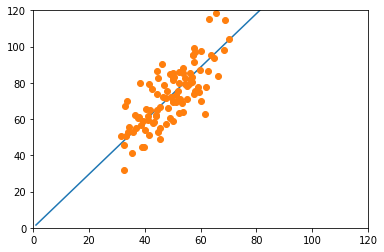

Error = 111.098846775


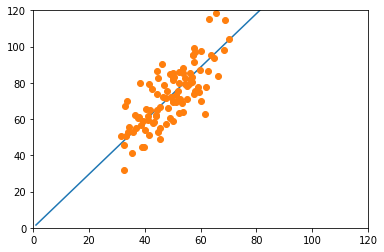

Error = 111.096924427


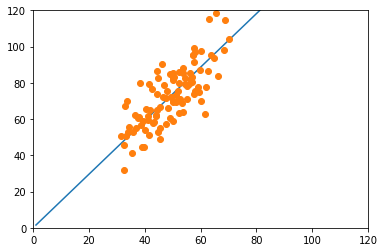

Error = 111.095004809


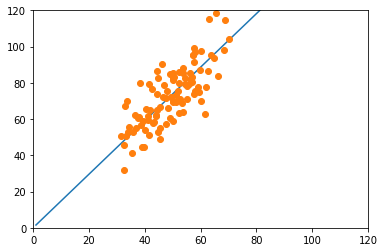

Error = 111.093087917
y = 1.47641729218*x + 0.0728431889659
Error = 111.091192875


(1.4764172921800742, 0.072843188965930408)

In [99]:
# create train_x and train_y

train_x = list()
train_y = list()
for i in range(99) :
    train_x.append(data["x"][i])
    train_y.append(data["y"][i])
    
def loss_function(m, b, train_x, train_y):
    n = len(train_x)
    totalError = 0
    for i in range(n) : 
        x = train_x[i]
        y = train_y[i]
        totalError += (y - (m*x + b))**2 # Sum Square Error (SSE)
    return totalError/float(n)
        
    
def gradient_descent(m_starting, b_starting, train_x, train_y, a, n) :
    m_gradient = 0
    b_gradient = 0
    new_m = m_starting
    new_b = b_starting
    for i in range(n) :        
        x = train_x[i]
        y = train_y[i]
        m_gradient += -(2/n)*x*(y - (m_starting*x + b_starting))
        b_gradient += -(2/n)*(y - (m_starting*x + b_starting))
    new_m += -(a*m_gradient)
    new_b += -(a*b_gradient)
    return new_m, new_b
    
    
# predict y = m*x + b
def train():
    learning_rate = 0.0001
    num_iterations = 1000
    m = 0 # initial m
    b = 0 # initial b
    n = len(train_x) # get size of data
    # training 
    for i in range(num_iterations) :            
        m, b = gradient_descent(m, b, train_x, train_y, learning_rate, n)        
        if (i % 100 == 0): 
            # visualize 
            x0 = np.linspace(1, 1000,120)
            y0 = m*x0 + b
            plt.axis([0,120, 0, 120])
            plt.plot(x0, y0,'-')
            plt.plot(train_x, train_y, 'o')
            plt.show()            
            print("Error = " + str(loss_function(m, b, train_x, train_y)))
    print("y = " + str(m) +  "*x + " + str(b))
    print("Error = " + str(loss_function(m, b, train_x, train_y)))
    return m,b
train()